## ¿El promedio global depende de la región de los estudiantes?

En esta sección se busca entender el por qué detras de los resultados tan desiguales en los resultados globales de la prueba ICFES y una de las razones que surgen a la mente es si el departamento donde el estudiante estudia influye. 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# df = pd.read_csv('/Users/Daniel\Desktop/programación/IntrodIngSistemasAnalíticaDeDatos/Resultados__nicos_Saber_11_20250316.csv')
df = pd.read_csv('https://www.datos.gov.co/resource/kgxf-xxbe.csv')

C:\Users\Daniel\AppData\Local\Temp\ipykernel_81992\2225090748.py:5: DtypeWarning: Columns (45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/Daniel\Desktop/programación/IntrodIngSistemasAnalíticaDeDatos/Resultados__nicos_Saber_11_20250316.csv')


## Gráfica con el API de datos.gov.co

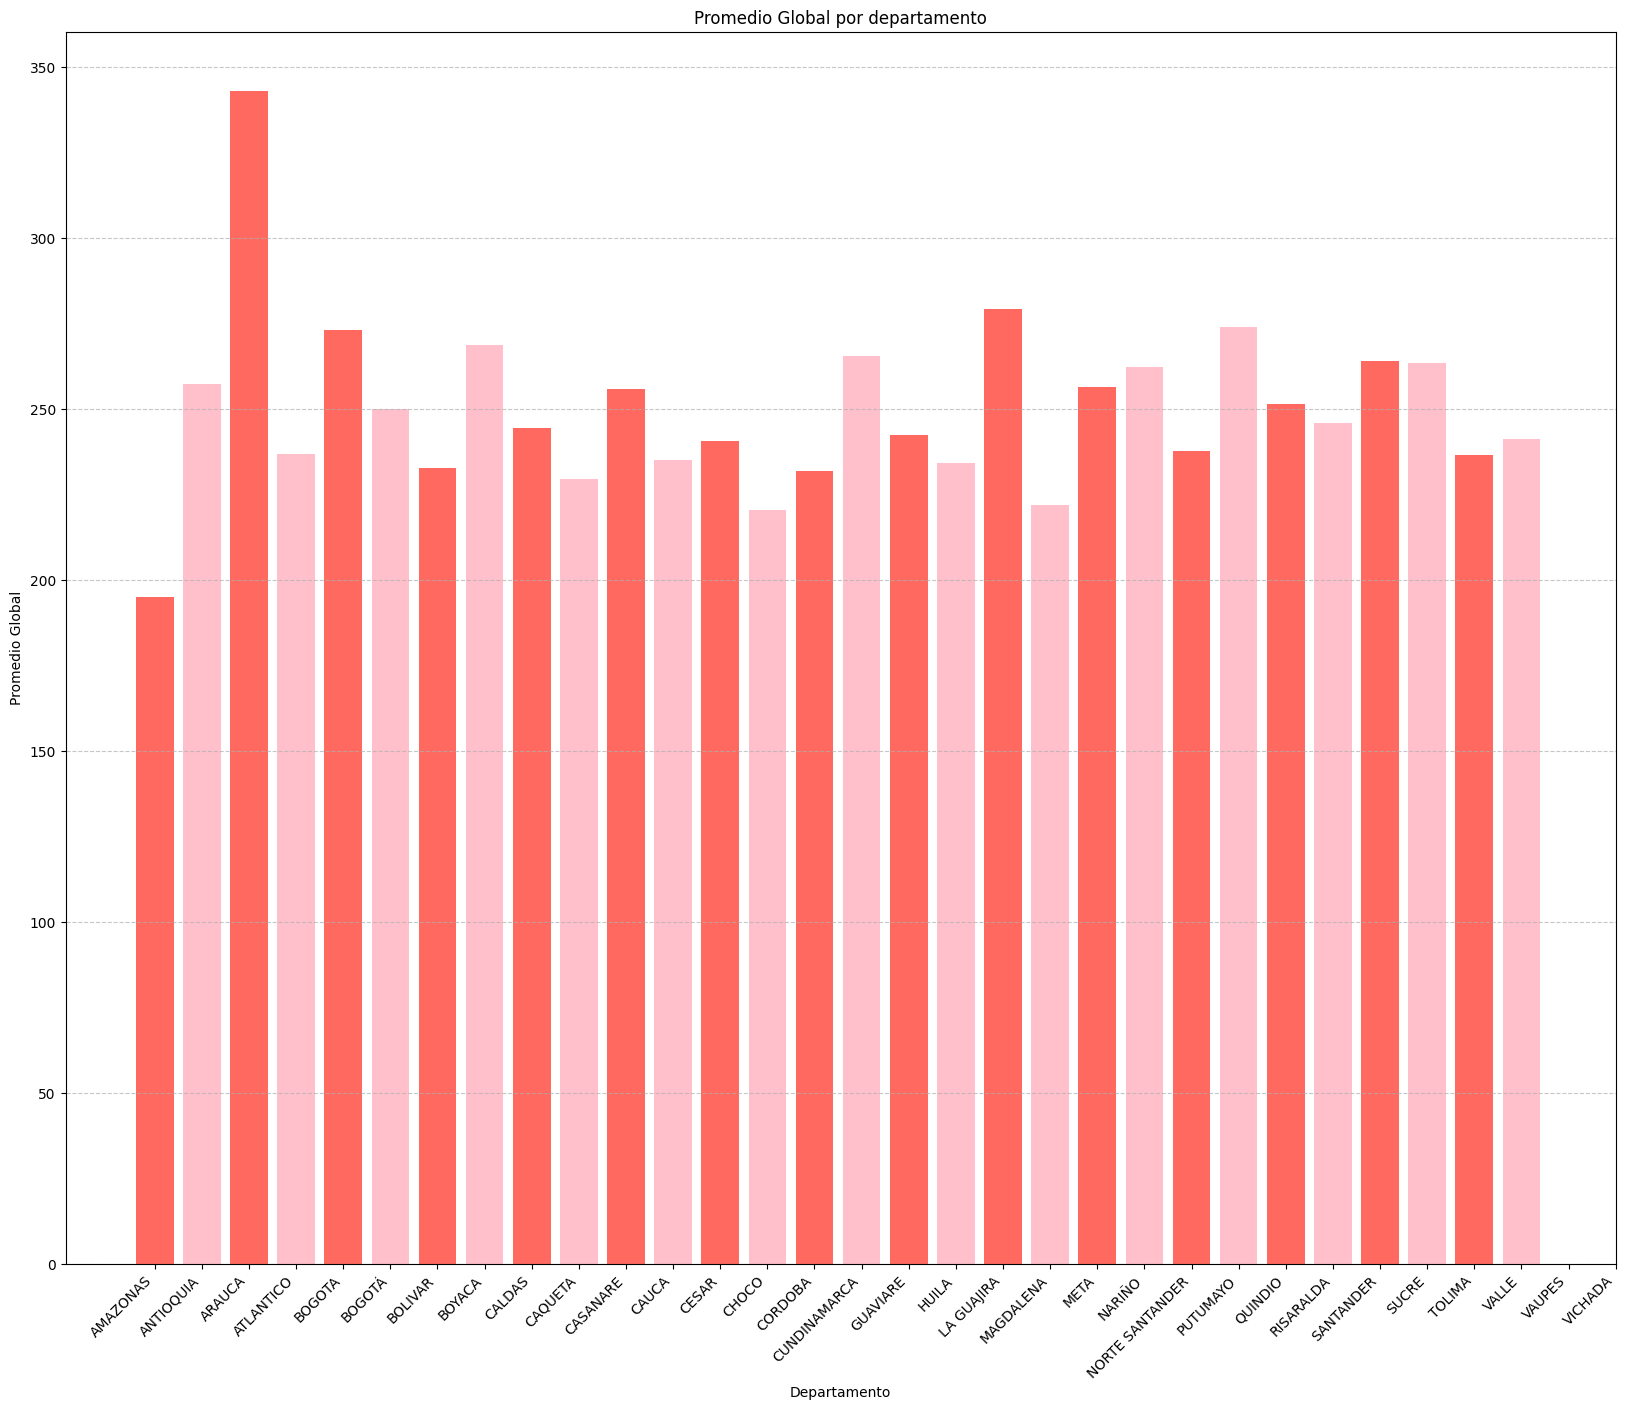

## Gráfica con la base de datos completa


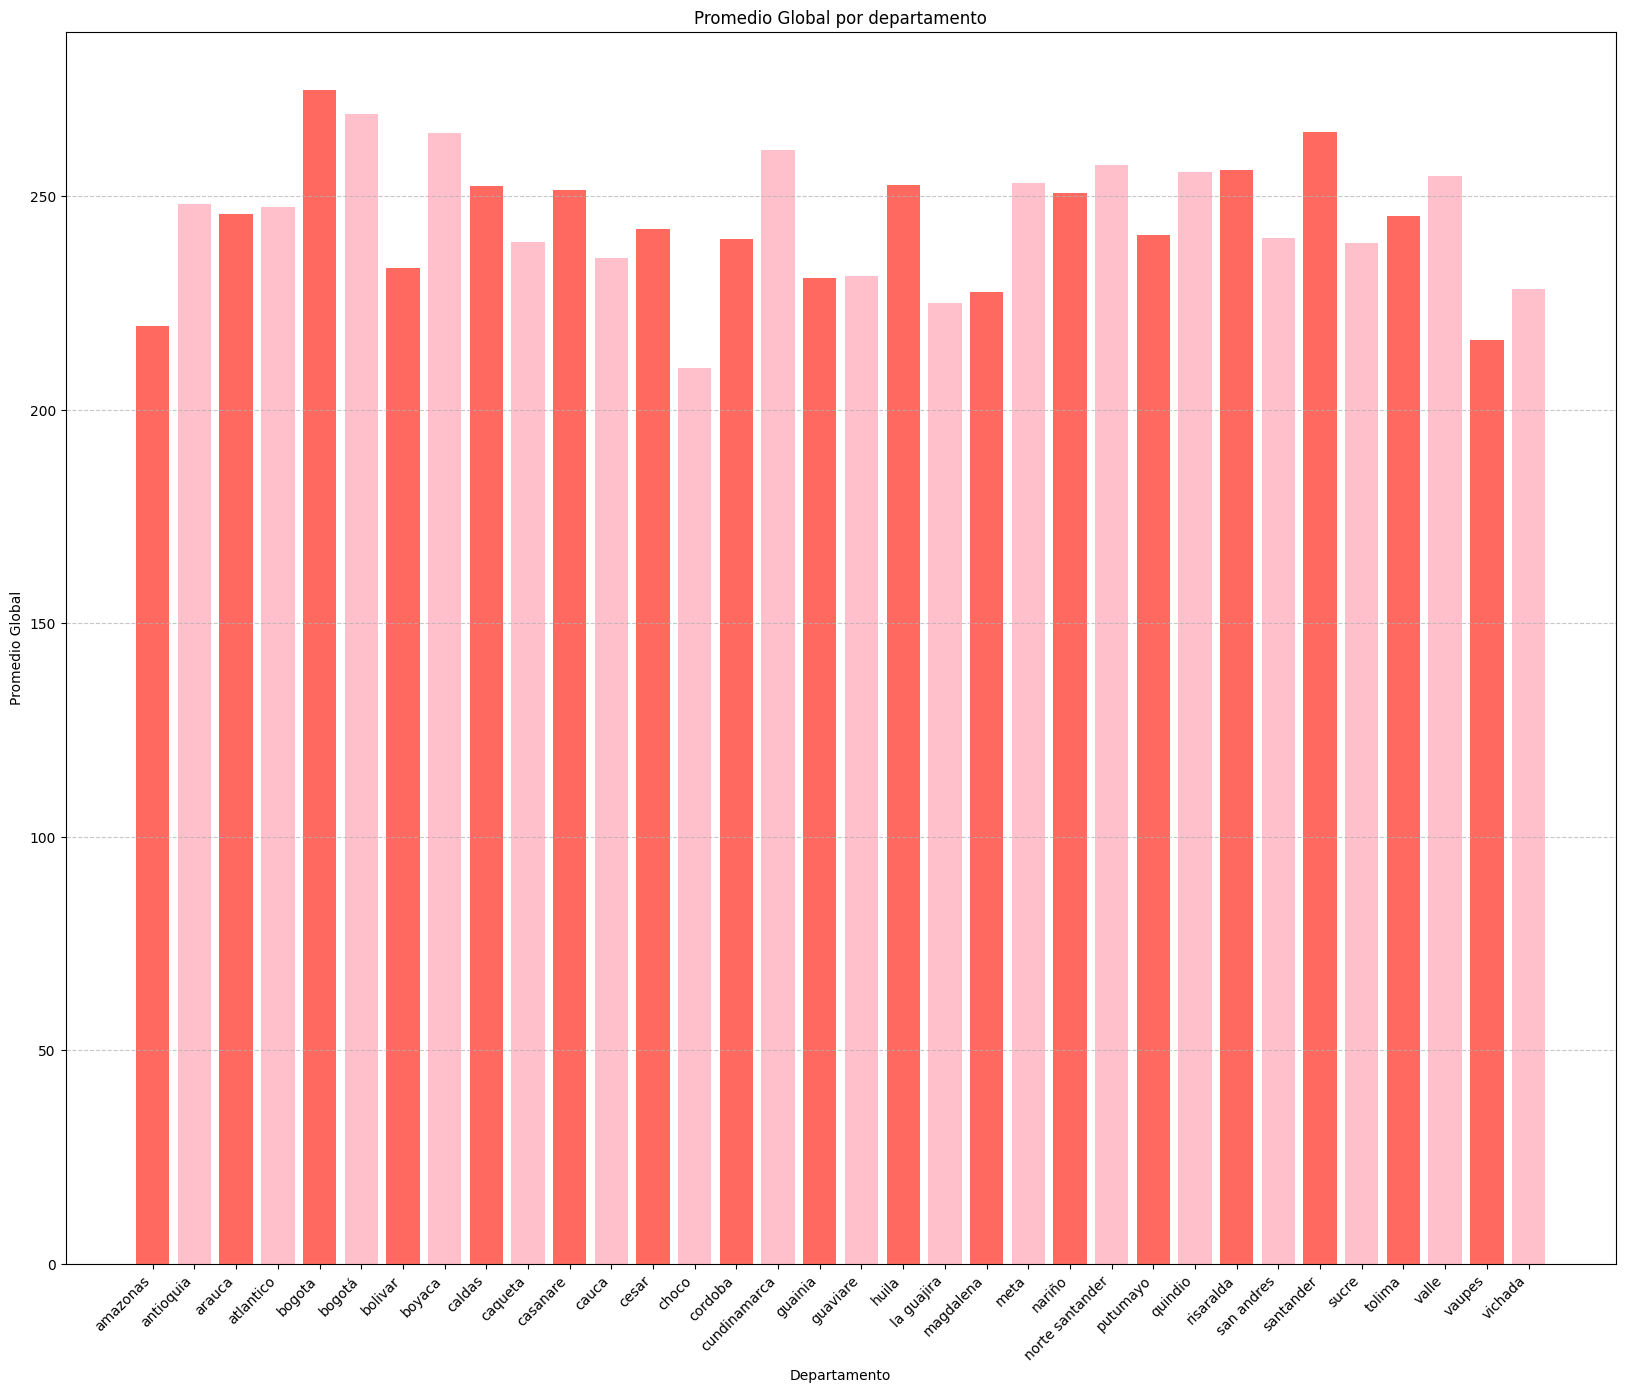

In [ ]:
df["punt_global"] = pd.to_numeric(df["punt_global"], errors="coerce")

# Calcular promedio por periodo
promedios_por_periodo = df.groupby("cole_depto_ubicacion")["punt_global"].mean()

# Crear tabla de promedios por periodo
tabla_promedios = df.groupby("cole_depto_ubicacion", as_index=False)["punt_global"].mean()
tabla_promedios.rename(columns={"punt_global": "promedio_global"}, inplace=True)

# Graficar
plt.figure(figsize=(20, 16))
plt.bar(tabla_promedios["cole_depto_ubicacion"], tabla_promedios["promedio_global"], color=['#ff695f', 'Pink'])

plt.xlabel("Departamento")  # Etiqueta para el eje X
plt.ylabel("Promedio Global")  # Etiqueta para el eje Y
plt.title("Promedio Global por departamento")  # Título de la gráfica

plt.xticks(tabla_promedios["cole_depto_ubicacion"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
(plt.xticks(rotation=45, ha="right"))

plt.show()

## Linea de tiempo de puntajes por periodo según departamento API datos.gov.co

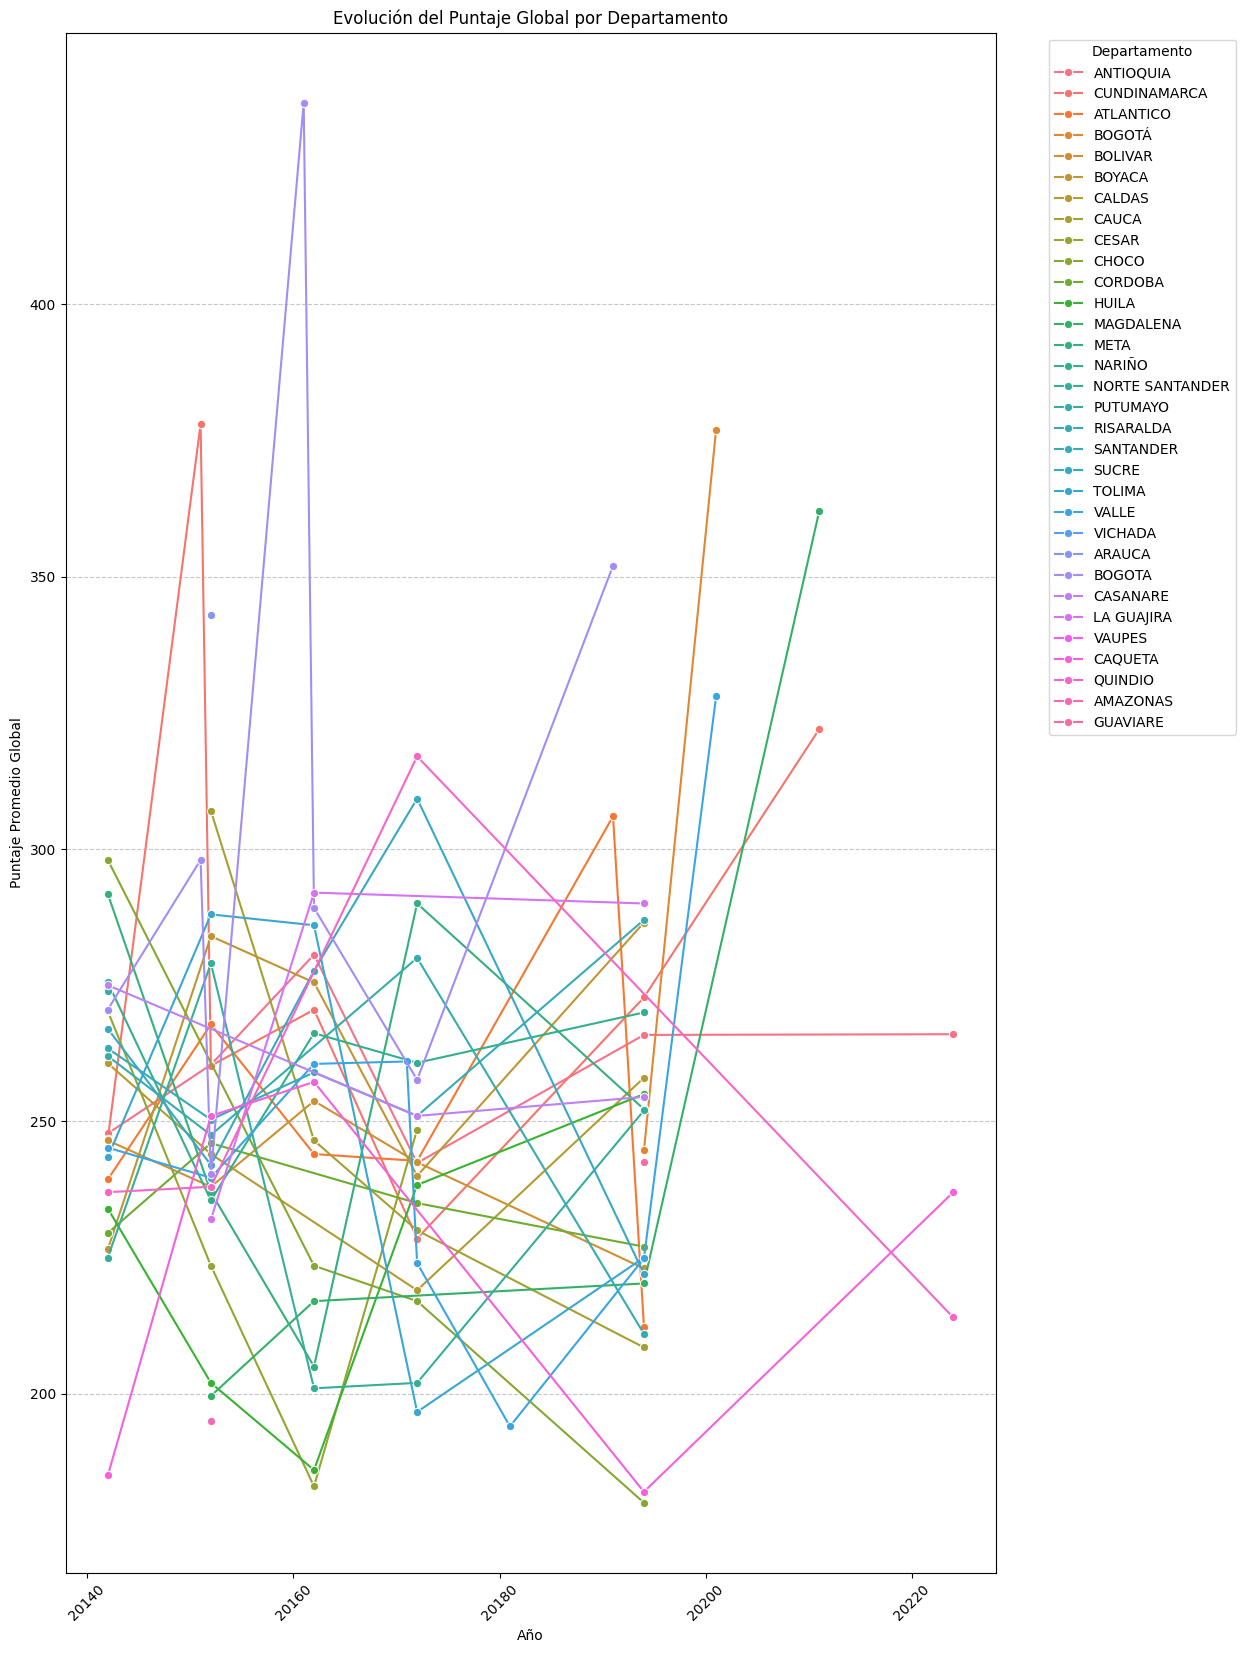

## Linea de tiempo de puntajes por periodo según departamento base de datos completa

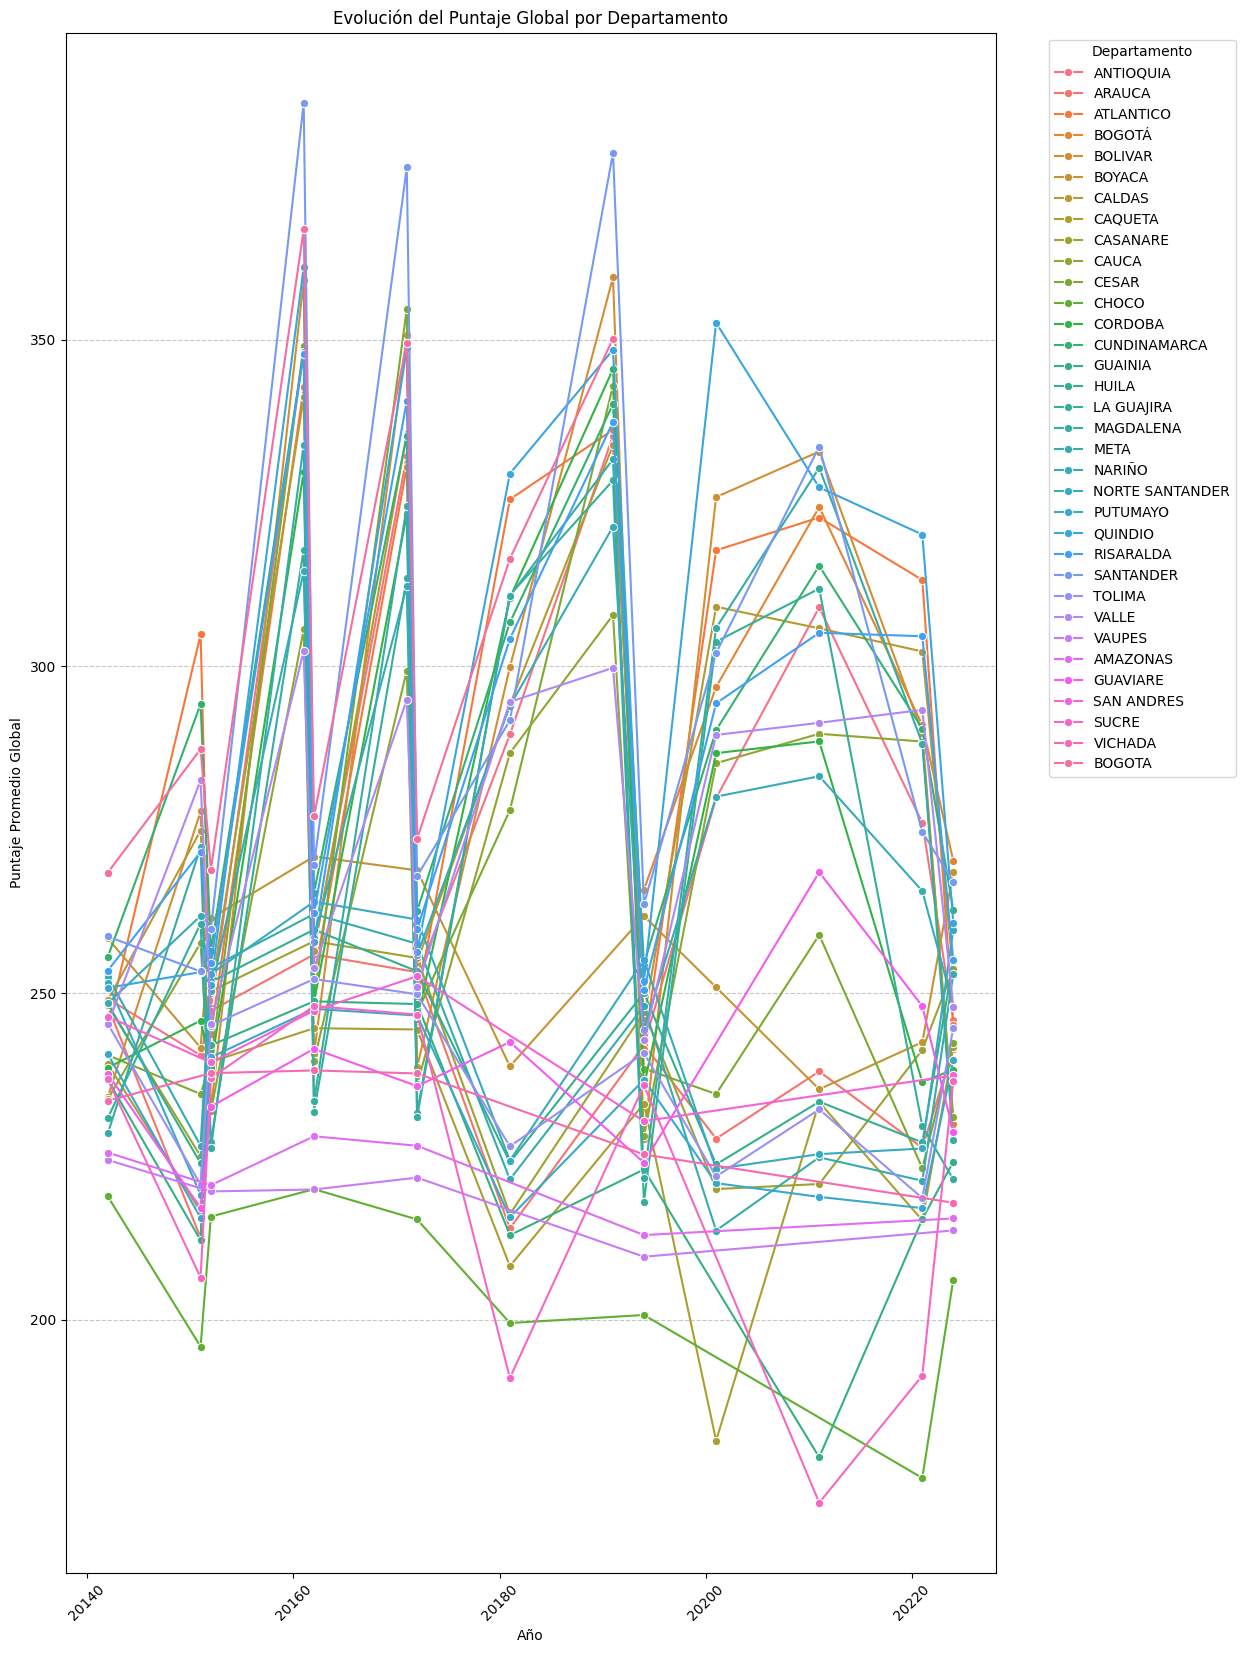

In [ ]:
# Calcular promedio por año y departamento
df_tiempo = df.groupby(["periodo", "cole_depto_ubicacion"], as_index=False)["punt_global"].mean()

# Graficar
plt.figure(figsize=(12, 20))
sns.lineplot(data=df_tiempo, x="periodo", y="punt_global", hue="cole_depto_ubicacion", marker="o")

plt.xlabel("Año")
plt.ylabel("Puntaje Promedio Global")
plt.title("Evolución del Puntaje Global por Departamento")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.legend(title="Departamento", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

## Distrbución del Puntaje Global según el departamento con la API

C:\Users\Daniel\AppData\Local\Temp\ipykernel_81992\679569843.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['cole_depto_ubicacion'], y=df['punt_global'], palette='pastel')


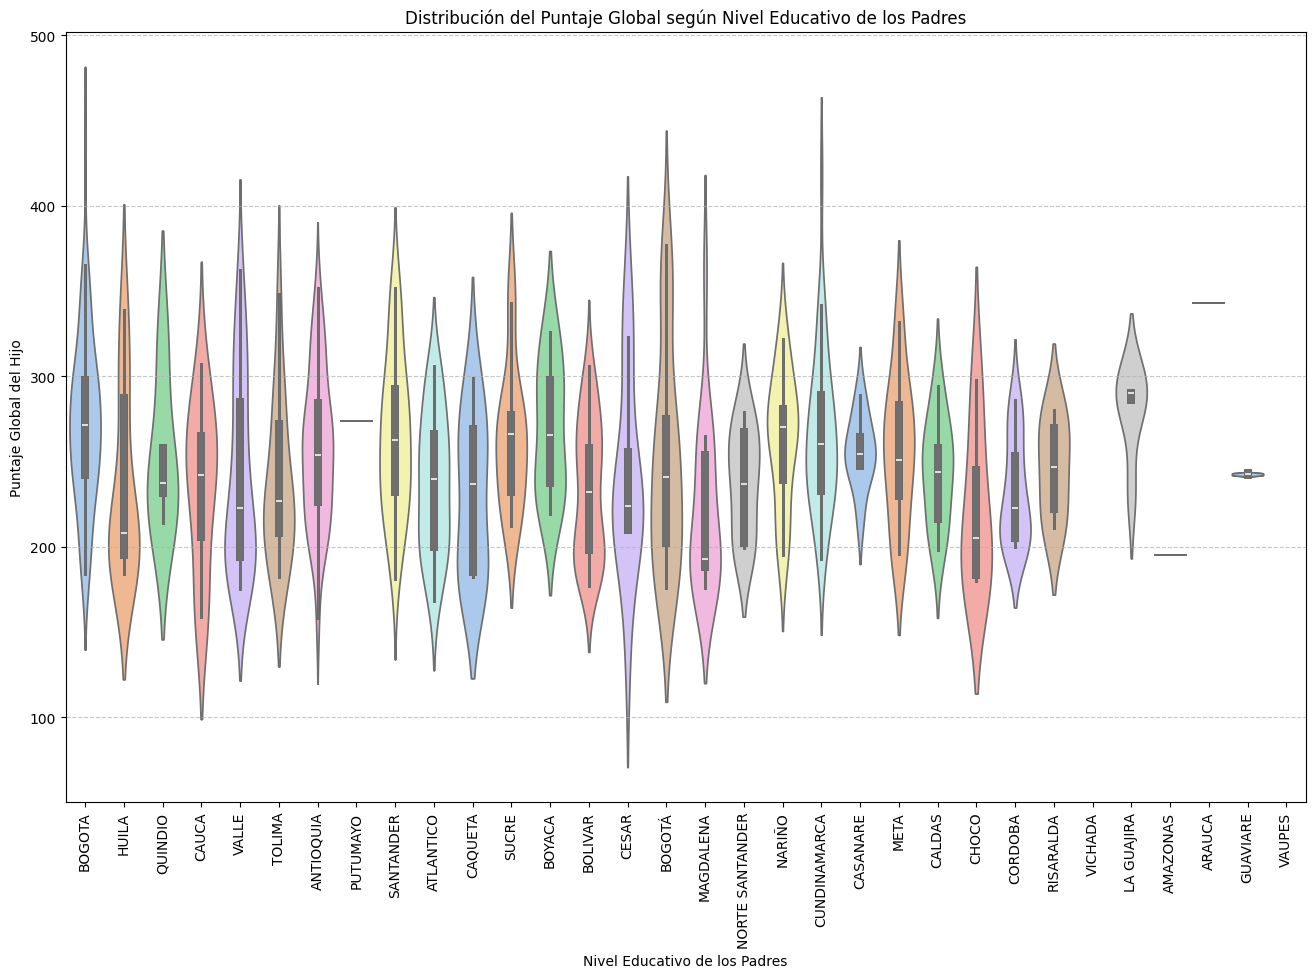

## Distrbución del Puntaje Global según el departamento con la base de datos completa

C:\Users\Daniel\AppData\Local\Temp\ipykernel_81992\1114269262.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['COLE_DEPTO_UBICACION'], y=df['PUNT_GLOBAL'], palette='pastel')


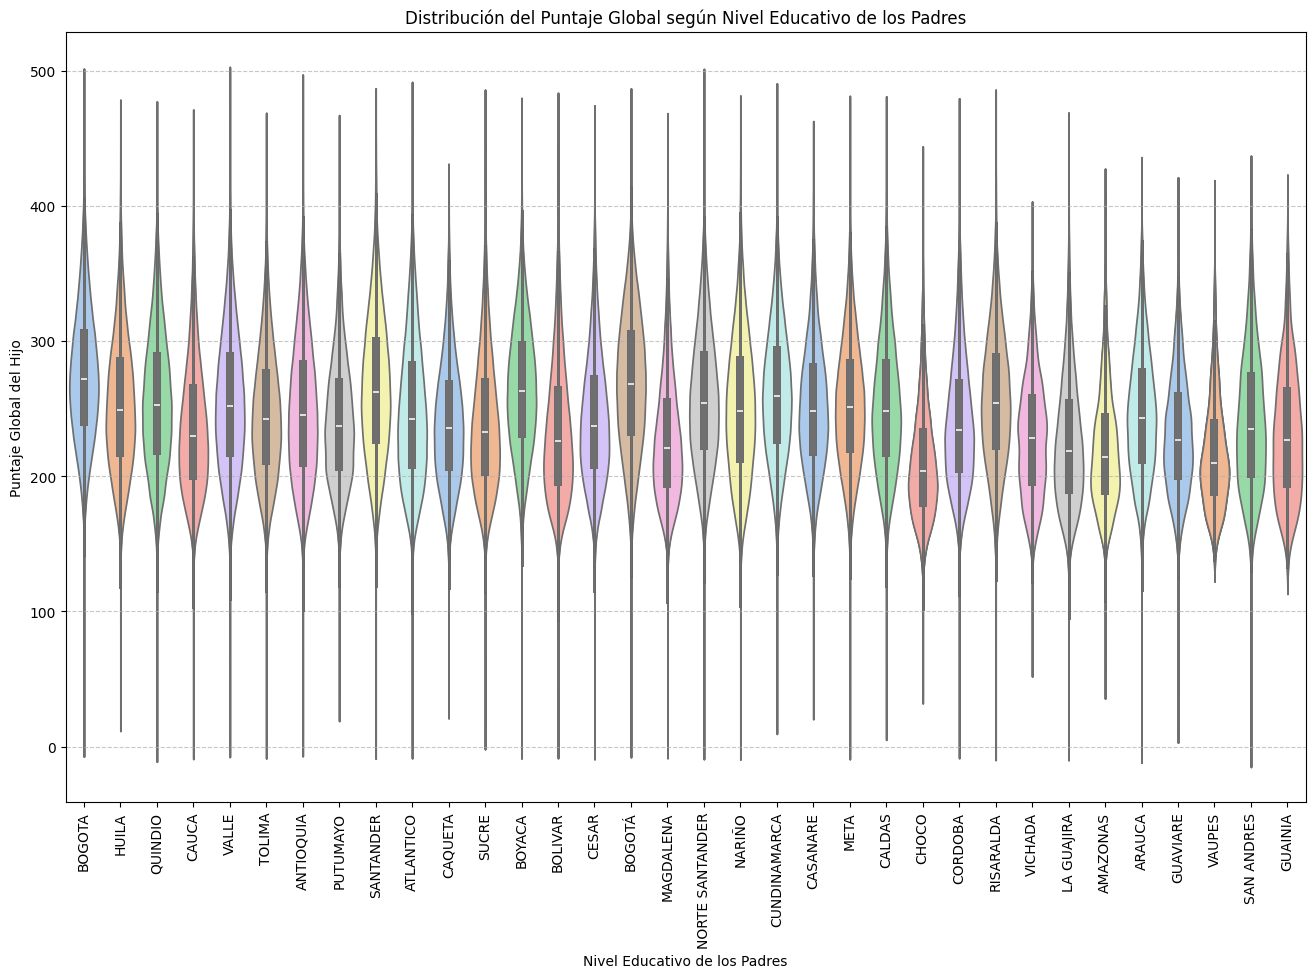

In [ ]:
plt.figure(figsize=(16, 10))
sns.violinplot(x=df['cole_depto_ubicacion'], y=df['punt_global'])

plt.xlabel('Nivel Educativo de los Padres')
plt.ylabel('Puntaje Global del Hijo')
plt.title('Distribución del Puntaje Global según Nivel Educativo de los Padres')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.violinplot(x=df['cole_depto_ubicacion'], y=df['punt_global'], palette='pastel')


plt.show()

## Diagrama de cajas del puntaje Global según el nivel educativo por el API

C:\Users\Daniel\AppData\Local\Temp\ipykernel_81992\793089882.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['cole_depto_ubicacion'], y=df['punt_global'], palette='pastel')


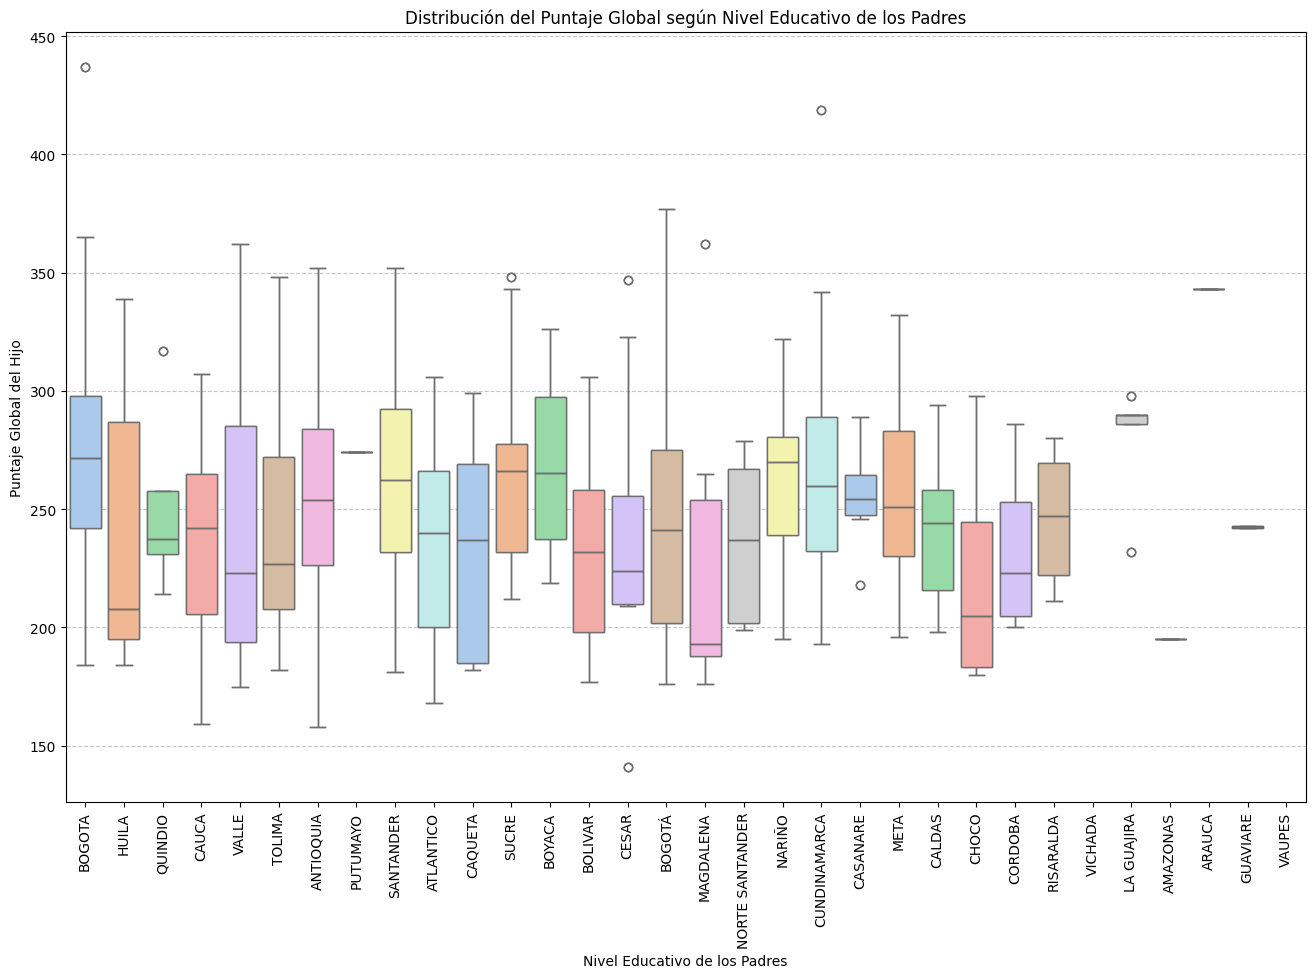

## Diagrama de Cajas con la base de Datos

C:\Users\Daniel\AppData\Local\Temp\ipykernel_81992\2657575918.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['COLE_DEPTO_UBICACION'], y=df['PUNT_GLOBAL'], palette='pastel')


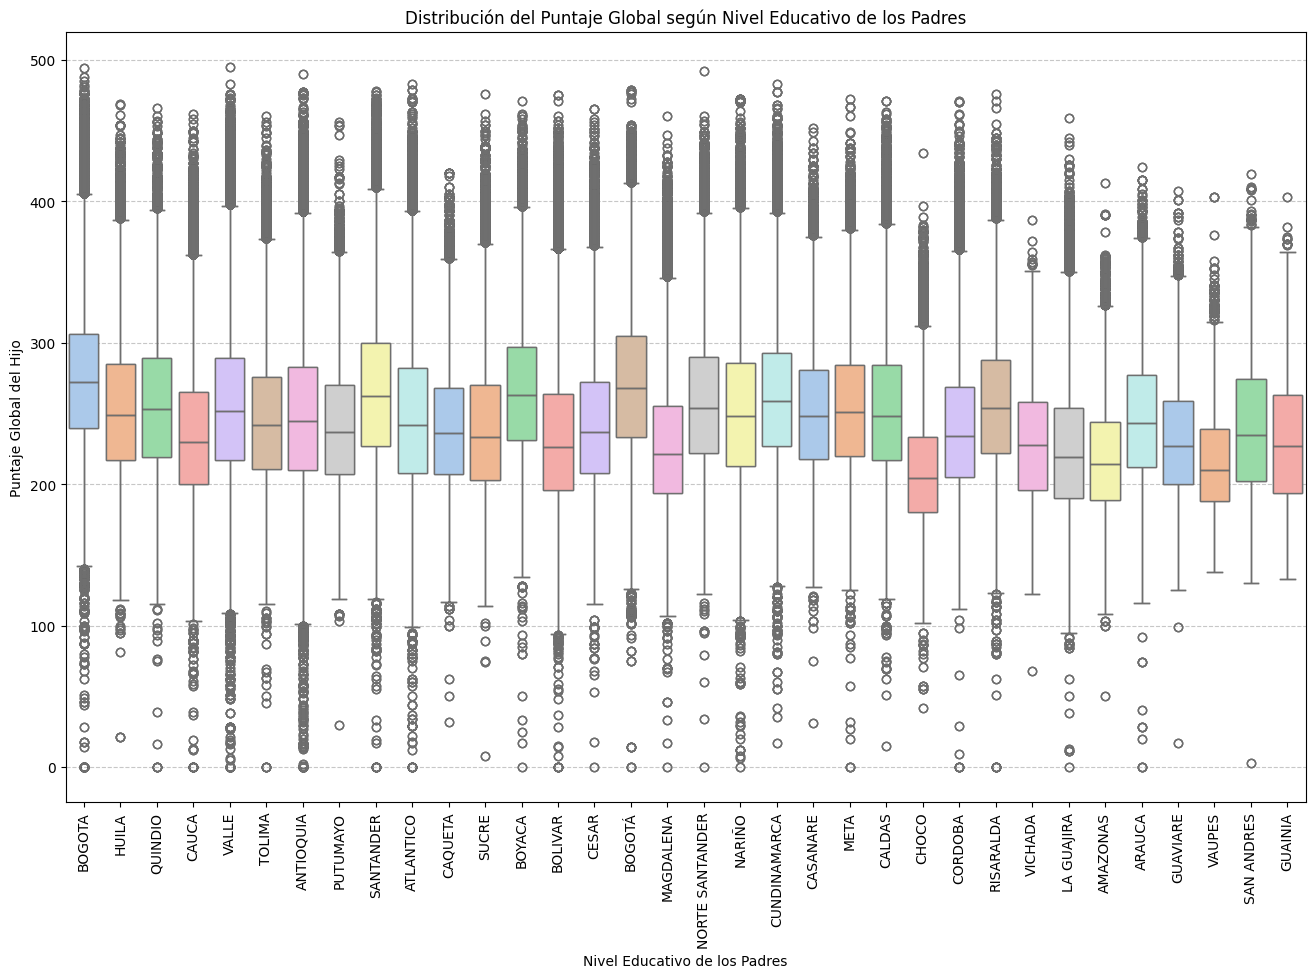

In [ ]:
plt.figure(figsize=(16, 10))
sns.boxplot(x=df['COLE_DEPTO_UBICACION'], y=df['PUNT_GLOBAL'])

plt.xlabel('Nivel Educativo de los Padres')
plt.ylabel('Puntaje Global del Hijo')
plt.title('Distribución del Puntaje Global según Nivel Educativo de los Padres')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.boxplot(x=df['COLE_DEPTO_UBICACION'], y=df['PUNT_GLOBAL'], palette='pastel')


plt.show()

## Puntaje Global Más Alto de cada Departamento

C:\Users\Daniel\AppData\Local\Temp\ipykernel_81992\2558792608.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=max_scores.index, y=max_scores.values, palette='pastel')


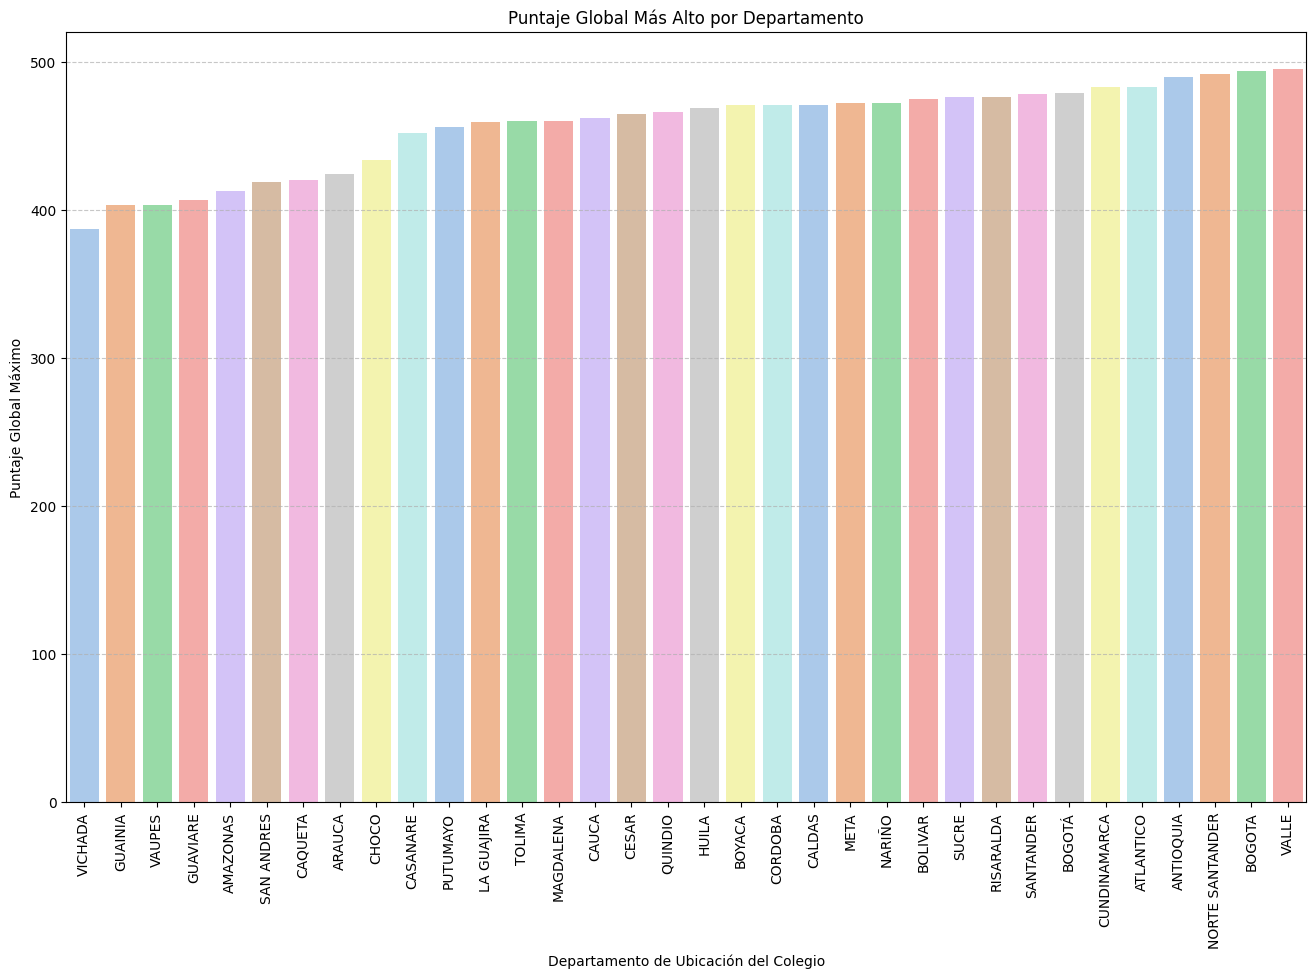

In [ ]:
df = df.dropna(subset=['COLE_DEPTO_UBICACION', 'PUNT_GLOBAL']) #se utilizo con la base completa, con el api no sirve este código

max_scores = df.groupby('COLE_DEPTO_UBICACION')['PUNT_GLOBAL'].max().sort_values()

plt.figure(figsize=(16, 10))

sns.barplot(x=max_scores.index, y=max_scores.values, palette='pastel')

plt.xlabel('Departamento de Ubicación del Colegio')
plt.ylabel('Puntaje Global Máximo')
plt.title('Puntaje Global Más Alto por Departamento')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## ¿El puntaje global depende de la región de origen?

<p>De acuerdo a la información de las gráficas en regiones con mayor importancia histórica como Cundimarca, Santander y Boyaca donde hay mejor situación económica vemos una gran diferencia de puntaje comparándolas con regiones con menor economía y con más áreas rurales como la guajira, Cundinamarca, Chocó, Vaupés, Vichada, Guainía.</p>

<p>Esto nos evidencia que la gran desigualdad que caracteriza a nuestro país ocasiona que el puntaje global si se vea afectado dependiendo de tu región de nacimiento en general, evidentemente esto no es algo que caracterize a las personas del lugar, pero si las limita al momento de acceder a información y otros factores que les dificulta salir adelante.</p>

<p>Además de todo esto también es clave mencionar que en estas regiones hay una menor densidad poblacional y son muy amplias lo que puede generar dificultades en algunos aspectos.</p>

<p>Algunos datos claves son: </p>

* La mediana es la menor en el Amazonas, en el Chocó y en el Vaupés, lo que nos indica que muchos de sus puntajes están en una media baja.
* El promedio más alto en global es el de Bogota
* El puntaje más alto alcanzado en el Chocó, en el Amazonas, en San Andrés, en Guaviare, en Vaupés, en Guainia, en Caqueta, en Arauca y sobretodo en el más bajo Vichada es muy distante con el resto de regiones.